# Data cleaning and processing
### Goal: Combine all IMDB data, merge with TMDB, replace "nulls" with nan, keep only useful features, process text,  and output to csv

_____
## Import libraries and data

In [102]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import imdb
import pandas as pd
import time
import numpy as np

In [103]:
imdb_data_1 = pd.read_csv("imdb_full_dataset_0_35999.csv")
imdb_data_2 = pd.read_csv("imdb_full_dataset_36000_36599.csv")
cols = imdb_data_1.columns
imdb_data_3 = pd.read_csv("all-results.tsv", sep='\t', header=None, names = cols[1:])
print(imdb_data_1.shape)
print(imdb_data_2.shape)
print(imdb_data_3.shape)

(25745, 46)
(324, 46)
(40557, 45)


In [104]:
del imdb_data_1['Unnamed: 0']
del imdb_data_2['Unnamed: 0']

In [105]:
tmdb_data = pd.read_csv("All_TMDB_info_merged.csv")

In [106]:
print(tmdb_data.shape)
#tmdb_data.head()
print(imdb_data_1.shape)
print(imdb_data_2.shape)
print(imdb_data_3.shape)

(79716, 16)
(25745, 45)
(324, 45)
(40557, 45)


In [107]:
imdb_data_3.ix[10:20,]

,id,title,canonical title,imdbIndex,kind,year,rating,mpaa,votes,runtimes,...,Short,Thriller,War,Western,Talk-Show,News,Game-Show,Reality-TV,History,Sport
10,tt2557964,My Four Boys,My Four Boys,null,episode,1963,7.0,null,18,[u'30'],...,0,0,0,0,0,0,0,0,0,0
11,tt0157256,15/67: TV,15/67: TV,null,movie,1967,3.9,null,317,[u'4'],...,1,0,0,0,0,0,0,0,0,0
12,tt0089933,Romanza final (Gayarre),Romanza final (Gayarre),null,movie,1986,6.9,null,13,[u'126'],...,0,0,0,0,0,0,0,0,0,0
13,tt1986760,The Vital Contact,"Vital Contact, The",null,episode,1965,null,null,null,null,...,0,0,0,0,0,0,0,0,0,0
14,tt0181612,null,null,null,movie,1972,5.3,null,12,null,...,0,0,0,1,0,0,0,0,0,0
15,tt0482468,Black Widower,Black Widower,null,tv movie,2006,5.4,null,168,[u'Greece:90'],...,0,1,0,0,0,0,0,0,0,0
16,tt0232079,Mela,Mela,null,movie,2000,3.8,null,3043,[u'172'],...,0,0,0,0,0,0,0,0,0,0
17,tt0233385,Brumes d'automne,Brumes d'automne,null,movie,1929,7.0,null,432,[u'15'],...,1,0,0,0,0,0,0,0,0,0
18,tt0292647,null,null,null,movie,2002,5.1,null,267,[u'96'],...,0,0,0,0,0,0,0,0,0,0
19,tt2105005,Ninja Nymphs in the 21st Century,Ninja Nymphs in the 21st Century,null,movie,1992,null,null,null,null,...,null,null,null,null,null,null,null,null,null,null


In [108]:
frames = [imdb_data_1, imdb_data_2, imdb_data_3]
imdb_data = pd.concat(frames)
imdb_data.shape

(66626, 45)

In [109]:
#imdb_data['id'] = imdb_data['id'].str.strip('tt')

In [110]:
imdb_data.columns

Index([u'id', u'title', u'canonical title', u'imdbIndex', u'kind', u'year',
       u'rating', u'mpaa', u'votes', u'runtimes', u'color info', u'genres',
       u'languages', u'plot', u'countries', u'director', u'writer', u'cast',
       u'certificates', u'Action', u'Adventure', u'Adult', u'Animation',
       u'Comedy', u'Crime', u'Documentary', u'Drama', u'Family', u'Fantasy',
       u'Film-Noir', u'Horror', u'Musical', u'Mystery', u'Romance', u'Sci-Fi',
       u'Short', u'Thriller', u'War', u'Western', u'Talk-Show', u'News',
       u'Game-Show', u'Reality-TV', u'History', u'Sport'],
      dtype='object')

In [111]:
imdb_data.head()

,id,title,canonical title,imdbIndex,kind,year,rating,mpaa,votes,runtimes,...,Short,Thriller,War,Western,Talk-Show,News,Game-Show,Reality-TV,History,Sport
0,tt0000159,null,null,null,movie,1897,5.5,null,23,[u'1'],...,1,0,0,0,0,0,0,0,0,0
1,tt0000598,Hamlet,Hamlet,null,movie,1907,5.3,null,18,null,...,1,0,0,0,0,0,0,0,0,0
2,tt0000709,Julius Caesar,Julius Caesar,I,movie,1908,5.8,null,12,null,...,1,0,0,0,0,0,0,0,1,0
3,tt0001078,Two Memories,Two Memories,null,movie,1909,6.6,null,5,[u'3'],...,1,0,0,0,0,0,0,0,0,0
4,tt0002031,As You Like It,As You Like It,null,movie,1912,5.2,null,6,null,...,null,null,null,null,null,null,null,null,null,null


In [112]:
#imdb_data['id'] = imdb_data['id'].str[0:2] + imdb_data['id'].str[3:]

In [113]:
imdb_data.head()

,id,title,canonical title,imdbIndex,kind,year,rating,mpaa,votes,runtimes,...,Short,Thriller,War,Western,Talk-Show,News,Game-Show,Reality-TV,History,Sport
0,tt0000159,null,null,null,movie,1897,5.5,null,23,[u'1'],...,1,0,0,0,0,0,0,0,0,0
1,tt0000598,Hamlet,Hamlet,null,movie,1907,5.3,null,18,null,...,1,0,0,0,0,0,0,0,0,0
2,tt0000709,Julius Caesar,Julius Caesar,I,movie,1908,5.8,null,12,null,...,1,0,0,0,0,0,0,0,1,0
3,tt0001078,Two Memories,Two Memories,null,movie,1909,6.6,null,5,[u'3'],...,1,0,0,0,0,0,0,0,0,0
4,tt0002031,As You Like It,As You Like It,null,movie,1912,5.2,null,6,null,...,null,null,null,null,null,null,null,null,null,null


## Which features should we keep from IMDB?

Likely to be helpful:
- Rating
- Votes
- Color info
- Languages
- Countries

Possibly helpful:
- Director
- Writer
- Cast

Probably not helpful:
- IMDB Index: mostly nulls
- MPAA: mostly nulls
- Certificate: mostly nulls
- Title: already getting this from TMDB
- Year: already getting from TMDB
- Runtimes: already getting from TMDB
- Plot: already getting "overview" from TMDB

## Keep only Rating, Votes, Color Info, Languages, Countries, Director, Writer, and Cast

In [114]:
for column_name in ['canonical title', 'imdbIndex', 'mpaa','kind','year', 'runtimes', 'plot', 'certificates']:
    del imdb_data[column_name]

imdb_useful = imdb_data

In [115]:
print imdb_useful.shape
imdb_useful.head()

(66626, 37)


,id,title,rating,votes,color info,genres,languages,countries,director,writer,...,Short,Thriller,War,Western,Talk-Show,News,Game-Show,Reality-TV,History,Sport
0,tt0000159,null,5.5,23,[u'Black and White'],"[u'Short', u'Horror']",null,[u'France'],null,null,...,1,0,0,0,0,0,0,0,0,0
1,tt0000598,Hamlet,5.3,18,[u'Black and White'],"[u'Short', u'Drama']",null,[u'France'],null,['William Shakespeare'],...,1,0,0,0,0,0,0,0,0,0
2,tt0000709,Julius Caesar,5.8,12,[u'Black and White'],"[u'Short', u'Drama', u'History']",[u'English'],[u'USA'],"['J. Stuart Blackton', 'William V. Ranous']","['Theodore A. Liebler Jr', 'William Shakespeare']",...,1,0,0,0,0,0,0,0,1,0
3,tt0001078,Two Memories,6.6,5,[u'Black and White'],"[u'Short', u'Drama']",[u'English'],[u'USA'],['D.W. Griffith'],['D.W. Griffith'],...,1,0,0,0,0,0,0,0,0,0
4,tt0002031,As You Like It,5.2,6,[u'Black and White'],null,[u'English'],[u'USA'],"['J. Stuart Blackton', 'Charles Kent', 'James ...",['William Shakespeare'],...,null,null,null,null,null,null,null,null,null,null


## Merge TMDB and IMDB datasets

In [116]:
result = tmdb_data.merge(imdb_useful, left_on='imdb_id', right_on='id', how='inner')

In [117]:
result.columns

Index([u'movie_id', u'revenue', u'overview', u'genres_x', u'title_x',
       u'vote_count', u'imdb_id', u'popularity', u'budget', u'vote_average',
       u'runtime', u'red_pixel', u'green_pixel', u'blue_pixel',
       u'release_date_month', u'release_date_year', u'id', u'title_y',
       u'rating', u'votes', u'color info', u'genres_y', u'languages',
       u'countries', u'director', u'writer', u'cast', u'Action', u'Adventure',
       u'Adult', u'Animation', u'Comedy', u'Crime', u'Documentary', u'Drama',
       u'Family', u'Fantasy', u'Film-Noir', u'Horror', u'Musical', u'Mystery',
       u'Romance', u'Sci-Fi', u'Short', u'Thriller', u'War', u'Western',
       u'Talk-Show', u'News', u'Game-Show', u'Reality-TV', u'History',
       u'Sport'],
      dtype='object')

In [118]:
result.shape

(63911, 53)

In [119]:
result['id']

0        tt2349554
1        tt2347289
2        tt0034853
3        tt0285808
4        tt0036255
5        tt0028566
6        tt0471871
7        tt0437467
8        tt0247145
9        tt0115522
10       tt0334765
11       tt0018509
12       tt0944139
13       tt1866101
14       tt1919017
15       tt1825772
16       tt0377845
17       tt0204782
18       tt0379158
19       tt0469169
20       tt0114005
21       tt2089863
22       tt0029058
23       tt3263056
24       tt3263152
25       tt0076692
26       tt0242635
27       tt3263048
28       tt0993846
29       tt0077357
           ...    
63881    tt4656772
63882    tt5635808
63883    tt0289784
63884    tt0459410
63885    tt2581644
63886    tt1261949
63887    tt0445510
63888    tt0050667
63889    tt0068376
63890    tt2262103
63891    tt6701346
63892    tt0314525
63893    tt0046946
63894    tt2381229
63895    tt0136545
63896    tt1776058
63897    tt0459525
63898    tt3275982
63899    tt0282200
63900    tt3661680
63901    tt1815906
63902    tt2

## Replace nulls with nan

In [120]:
result_nona = result.replace(to_replace="null", value=np.nan, inplace=False)

In [121]:
result_nona.head()

,movie_id,revenue,overview,genres_x,title_x,vote_count,imdb_id,popularity,budget,vote_average,...,Short,Thriller,War,Western,Talk-Show,News,Game-Show,Reality-TV,History,Sport
0,106505,0,"Relentlessly gruesome, South Korean filmmaker ...","['Horror', 'Action', 'Foreign']",The Butcher,6,tt2349554,0.000814,0,5.8,...,1,0,0,0,0,0,0,0,0,0
1,106507,0,"takes pride in calling himself a ""Sesky Video ...",[],Bittoo Boss,0,tt2347289,0.003110,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,106509,0,A young millionaire (Richard Carlson) joins th...,"['Adventure', 'Comedy', 'Crime', 'Romance']",Highways by Night,1,tt0034853,0.000155,0,6.0,...,0,0,0,0,0,0,0,0,0,0
3,106511,0,"Rd Cokro, a wealthy businessman, obtains his w...","['Horror', 'Fantasy']",The Snake Queen,0,tt0285808,0.000083,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,106513,0,"The city's District Attorney is murdered, and ...","['Action', 'Thriller', 'Crime', 'Mystery']",The Payoff,2,tt0036255,0.010632,0,6.5,...,0,0,0,0,0,0,0,0,0,0


## Check the distribution of genres

In [122]:
genres = result_nona.ix[:,30:]
genres_nona = genres.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
genres_nona = genres_nona.astype(int)
genres_nona.describe()

,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Horror,Musical,...,Short,Thriller,War,Western,Talk-Show,News,Game-Show,Reality-TV,History,Sport
count,59453.000000,59453.000000,59453.000000,59453.000000,59453.000000,59453.000000,59453.000000,59453.000000,59453.000000,59453.000000,...,59453.000000,59453.000000,59453.000000,59453.000000,59453.000000,59453.000000,59453.000000,59453.000000,59453.000000,59453.000000
mean,0.059745,0.302289,0.103662,0.088322,0.406472,0.078112,0.047567,0.004760,0.059476,0.029284,...,0.123610,0.097287,0.029385,0.033859,0.017089,0.006139,0.007485,0.004659,0.021260,0.016517
std,0.237015,0.459254,0.304824,0.283765,0.491179,0.268350,0.212850,0.068829,0.236515,0.168602,...,0.329139,0.296351,0.168883,0.180867,0.129605,0.078113,0.086192,0.068099,0.144253,0.127455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
bars = genres_nona.describe().ix[1,]

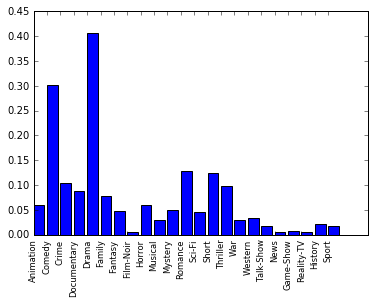

In [124]:
plt.bar(range(len(genres.columns)), bars.values)
plt.xticks(range(len(genres.columns)), genres.columns, size='small')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

## We need to process Color Info, Languages, Countries, Director, Writer, and Cast

### Process languages

In [125]:
from sklearn.feature_extraction.text import CountVectorizer

In [126]:
def bagOfWords(column_name, max_features):
    count = 0
    all_words = []
    print column_name
    for i in result_nona[column_name]:
        i=str(i).replace(" ", "")
        try:
            all_words.append(i.decode('utf-8'))
        except:
            all_words.append('')
    print("Word examples",all_words[10:20])
    vectorizer = CountVectorizer(stop_words = 'english', max_features=max_features)
    all_data_features = vectorizer.fit_transform(all_words).todense()
    all_feature_names = [column_name + '_' +i.encode('utf-8') for i in vectorizer.get_feature_names()]
    print "Feature names", all_feature_names[:10]
    for i in range(len(all_feature_names)):
        result_nona[all_feature_names[i]] = all_data_features[:,i]
    del result_nona[column_name]
    print(" ")

In [127]:
for column_name in ['color info', 'languages', 'countries']:
    bagOfWords(column_name, max_features=100)

color info
('Word examples', [u"[u'Color']", u"[u'BlackandWhite']", u"[u'Color']", u'nan', u'nan', u"[u'Color']", u"[u'Color']", u'nan', u"[u'Color']", u"[u'Color']"])
Feature names ['color info_16mmversion', 'color info_1966', 'color info_1969', 'color info_1970', 'color info_35mmversion', 'color info_agfacolor', 'color info_alphacine', 'color info_anscocolor', 'color info_archivefilms', 'color info_archivefootage']
 
languages
('Word examples', [u"[u'Korean']", u'nan', u"[u'Indonesian']", u"[u'English']", u'nan', u"[u'English']", u"[u'Hindi']", u'nan', u"[u'English']", u"[u'English']"])
Feature names ['languages_aboriginal', 'languages_afrikaans', 'languages_albanian', 'languages_americansignlanguage', 'languages_arabic', 'languages_armenian', 'languages_assamese', 'languages_azerbaijani', 'languages_bambara', 'languages_basque']
 
countries
('Word examples', [u"[u'SouthKorea']", u"[u'USA']", u"[u'Indonesia']", u"[u'USA']", u'nan', u"[u'USA']", u"[u'India']", u"[u'UK']", u"[u'USA']",

In [128]:
for column_name in ['director', 'writer', 'cast']:
    bagOfWords(column_name, max_features=100)

director
('Word examples', [u"['Hyung-raeShim']", u"['WaltDisney']", u"['H.TjutDjalil']", u"['LelaSwift']", u"['Hans-PeterKaufmann']", u"['AlexChapple']", u"['SukhwantDhadda']", u"['DavidAsh','DaiRichards']", u"['DanielAnker']", u"['TomPutnam']"])
Feature names ['director_albertherman', 'director_alfrede', 'director_alfredhitchcock', 'director_alfredob', 'director_aliceo', 'director_allandwan', 'director_amato', 'director_arthurdavis', 'director_brianlarge', 'director_burtgillett']
 
writer
('Word examples', [u"['Sang-deokLee']", u"['WaltDisney']", u'nan', u"['DanCurtis','GordonRussell','ArtWallace']", u"['NiklasFrank','Hans-PeterKaufmann','HerbertRosendorfer']", u"['DavidS.Goyer','BarbaraNance']", u"['RajinderSinghBedi','RajinderSinghBedi','MadanJoshi','PhaniMajumdar','MakhanSingh']", u'nan', u'nan', u'nan'])
Feature names ['writer_agenoreincrocci', 'writer_albertdemond', 'writer_amico', 'writer_armandjammot', 'writer_arthurconandoyle', 'writer_artwallace', 'writer_basildickey', 'writ

### Output data to csv

In [129]:
final_output = result_nona
final_output.shape

(63911, 647)

In [130]:
final_output.ix[:,0:20].head()

,movie_id,revenue,overview,genres_x,title_x,vote_count,imdb_id,popularity,budget,vote_average,runtime,red_pixel,green_pixel,blue_pixel,release_date_month,release_date_year,id,title_y,rating,votes
0,106505,0,"Relentlessly gruesome, South Korean filmmaker ...","['Horror', 'Action', 'Foreign']",The Butcher,6,tt2349554,0.000814,0,5.8,75.0,31.089602,22.249398,16.277523,1.0,1.0,tt2349554,Hier bei mir,NaN,NaN
1,106507,0,"takes pride in calling himself a ""Sesky Video ...",[],Bittoo Boss,0,tt2347289,0.003110,0,0.0,145.0,164.338252,127.691769,111.668393,13.0,4.0,tt2347289,The Jubilee Girl,6.8,16
2,106509,0,A young millionaire (Richard Carlson) joins th...,"['Adventure', 'Comedy', 'Crime', 'Romance']",Highways by Night,1,tt0034853,0.000155,0,6.0,65.0,167.459018,145.926456,125.274450,2.0,10.0,tt0034853,Highways by Night,6.9,18
3,106511,0,"Rd Cokro, a wealthy businessman, obtains his w...","['Horror', 'Fantasy']",The Snake Queen,0,tt0285808,0.000083,0,0.0,82.0,126.662263,115.849543,95.580740,1.0,1.0,tt0285808,Nyi blorong,6.8,33
4,106513,0,"The city's District Attorney is murdered, and ...","['Action', 'Thriller', 'Crime', 'Mystery']",The Payoff,2,tt0036255,0.010632,0,6.5,74.0,141.859560,131.293856,130.404254,24.0,11.0,tt0036255,The Pay Off,5.7,108


In [131]:
final_output.ix[:,20:41].head()

,genres_y,Action,Adventure,Adult,Animation,Comedy,Crime,Documentary,Drama,Family,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Short,Thriller,War,Western
0,"[u'Drama', u'Musical', u'Romance', u'Short']",0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
1,[u'Biography'],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[u'Adventure', u'Comedy', u'Crime', u'Romance']",0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,"[u'Fantasy', u'Horror']",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"[u'Action', u'Crime', u'Film-Noir', u'Mystery'...",1,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,0


In [132]:
final_output.ix[:,40:].head()

,Western,Talk-Show,News,Game-Show,Reality-TV,History,Sport,color info_16mmversion,color info_1966,color info_1969,...,cast_william,cast_williamb,cast_williamh,cast_williams,cast_wilson,cast_wing,cast_yi,cast_young,cast_yu,cast_yun
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
final_output.shape

(63911, 647)

In [134]:
#reduced_set = final_output[final_output['title_x']==final_output['title_y']]

In [135]:
#reduced_set.shape

(26107, 647)

In [137]:
#reduced_set.head()

,movie_id,revenue,overview,genres_x,title_x,vote_count,imdb_id,popularity,budget,vote_average,...,cast_william,cast_williamb,cast_williamh,cast_williams,cast_wilson,cast_wing,cast_yi,cast_young,cast_yu,cast_yun
2,106509,0,A young millionaire (Richard Carlson) joins th...,"['Adventure', 'Comedy', 'Crime', 'Romance']",Highways by Night,1,tt0034853,0.000155,0,6.0,...,0,0,0,0,0,0,0,0,0,0
11,106555,0,"Oswald the Lucky Rabbit runs a trolley, but fi...",['Animation'],Trolley Troubles,4,tt0018509,0.003423,0,5.9,...,0,0,0,0,0,0,0,0,0,0
16,106596,0,Rani gets into trouble after the death of her ...,[],Ek Chadar Maili Si,1,tt0377845,0.000999,0,9.0,...,0,0,0,0,0,0,0,0,0,0
17,106598,0,"Leading statesmen, generals, terrorists and ot...","['Documentary', 'History', 'War']",The 50 Years War: Israel and the Arabs,0,tt0204782,0.000215,0,0.0,...,0,0,0,0,0,0,0,0,0,0
18,106599,0,Daniel Anker_��s 90-minute documentary takes o...,"['Documentary', 'History']",Imaginary Witness: Hollywood and the Holocaust,2,tt0379158,0.110808,0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
#reduced_set.to_csv("imdb_tmdb_full_dataset_clean.csv")

In [141]:
#reduced_set[['title_x', 'title_y','genres_x','genres_y']]